# ProDy test case

See [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2836427/)

Before we start, we load the necessary modules. 

Also, do not forget to load the functions in the Toolkit at the end of this notebook.

In [1]:
%matplotlib inline
import numpy as np                    # load numerical library
from matplotlib import pyplot as plt  # load plotting library
from prody import *                   # load prody library
prody.checkUpdates()                  # check prody is up to date

@> ProDy v1.10.8 is available, you are using 1.9.2.


## Load structure
here we define the folder name where PDB files are stored locally, and the filename of the PDB we want to load.

In [13]:
pdbs_folder  = 'pdbs'
nmds_folder  = 'nmds'
pdb_filename = '4FZ0.pdb'

Now we load the PDB file in the `pdb1` object, and define the actual selection of atoms we want to study. 

See [this webpage](http://prody.csb.pitt.edu/manual/reference/proteins/pdbfile.html#module-prody.proteins.pdbfile) to read more about PDB file handling in ProDy.

In [14]:
pdb1 = parsePDB(pdbs_folder+'/'+pdb_filename)
atom_selection = pdb1.select('protein and name CA')

@> 10557 atoms and 1 coordinate set(s) were parsed in 0.07s.


## Build the Anisotropic (Elastic) Network Model

See [this webpage](http://prody.csb.pitt.edu/tutorials/enm_analysis/anm.html) for details on what that means...

In [15]:
jobname = 'pdb1 ANM analysis'
cutoff=15.0 
gamma=1.0

Build the hessian, and examine it:

In [16]:
anm = build_hessian(jobname,atom_selection,cutoff=cutoff,gamma=gamma)

@> Hessian was built in 0.64s.


Size of the hessian:  (3996, 3996)


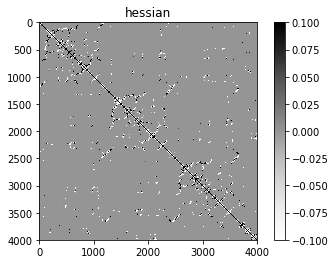

In [17]:
plot_hessian(anm,vrange=[-0.1,0.1])

## Compute the normal modes
We decide to compute `n_modes` modes. If set to `None`, all modes will be computed.

In [18]:
n_modes = None #100

In [19]:
eigenvalues, eigenvectors = compute_modes(anm,n_modes=n_modes)

@> 3990 modes were calculated in 6.71s.


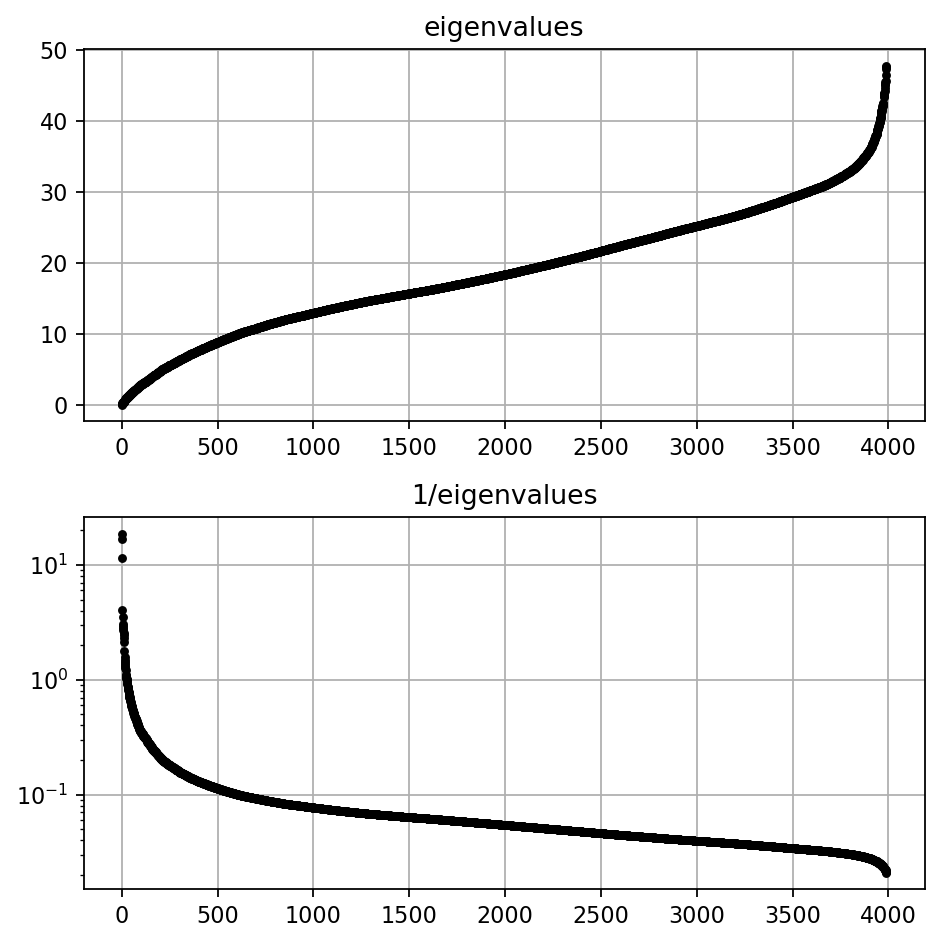

In [22]:
plot_spectrum(eigenvalues,figsize=6)

## Output results

We will write the eigenvalues to file, as well as the normal modes.

**TBD:** also write the eigenvectors to PDB file

In [23]:
eig_filename='test_eig.txt'
nmd_filename='test_anm_modes.nmd'

In [24]:
np.savetxt(nmds_folder+'/'+eig_filename, eigenvalues, header='EIGENVALUE FOR '+jobname)

In [25]:
writeNMD(nmds_folder+'/'+nmd_filename, anm[:], atom_selection)

'nmds/test_anm_modes.nmd'

# Toolkit
Here we define a few useful functions

In [11]:
def build_hessian(jobname,atom_selection,cutoff=15.0,gamma=1.0):
    """ build_hessian: ...
    ...
    """
    anm = ANM(jobname)
    anm.buildHessian(atom_selection,cutoff=cutoff,gamma=gamma)
    return anm

def compute_modes(anm,n_modes=None):
    """ compute_modes: ...
    """
    anm.calcModes(n_modes=n_modes,zeros=False)
    eigenvalues  = anm.getEigvals().round(3)
    eigenvectors = anm.getEigvecs().round(3)
    return eigenvalues, eigenvectors

In [21]:
def plot_hessian(anm,xyrange=None,sampling=1,vrange=[0,1]):
    """ plot_hessian: show Hessian matrix
    Parameters
    ----------
    - xyrange  : the first and last index you want to plot. Namely hessian[range[0]:range[1],range[0]:range[1]]
    - sampling : only show every sampling-th index
    - vrange   : restrict the color value to that range
    """
    hessian = anm.getHessian()
    print("Size of the hessian: ",hessian.shape)
    if xyrange is None:
        xyrange=[0,hessian.shape[0]]
    plt.imshow(hessian[xyrange[0]:xyrange[1]:sampling,xyrange[0]:xyrange[1]:sampling],cmap='Greys',vmin=vrange[0],vmax=vrange[1])
    plt.colorbar()
    plt.title('hessian')
    
def plot_spectrum(eigenvalues,figsize=12):
    """ plot_spectrum: ...
    """
    nrow=2
    ncol=1
    fig = plt.figure(figsize=(figsize, figsize), dpi= 160, facecolor='w', edgecolor='k')
    plt.subplot(nrow,ncol,1)
    plt.title('eigenvalues')
    plt.grid()
    plt.plot(eigenvalues,'.',color='k')
    plt.subplot(nrow,ncol,2)
    plt.title('1/eigenvalues')
    plt.grid()
    plt.yscale('log')
    plt.plot(1.0/(eigenvalues),'.',color='k')
    plt.tight_layout()
    plt.show()